# A Brief Analysis of the 2020 Stack Overflow Developer Survey Data
## Part 2

## 1. Business Understanding
I am conducting an analysis on the 2020 Stack Overflow Developer Survey Data to answer the following question:

- Does country of organization affect the developers’ level of influence on technology purchase? 

To get started, let's read in the necessary libraries and the CSV file of the raw data of the survey:

In [68]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

df = pd.read_csv('Data/developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## 2. Data Understanding

To understand how many attributes (columns) and records (rows) the survey results have, I'll use (shape). The dataset has 61 attributes and 64,461 records:

In [70]:
# Return the dimensionality of the data frame
df.shape

(64461, 61)

Now let's list all attributes:

In [71]:
# Get a list of all column names
list(df.columns) 

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

The 3 columns that we will use in this analysis are: OrgSize, PurchaseWhat and Country. Let's take a look at their types and values:

In [77]:
# Print thre data types using (dtypes[])

print('OrgSize data type is:',df.dtypes['OrgSize'])
print('PurchaseWhat data type is:',df.dtypes['PurchaseWhat'])
print('Country data type is:',df.dtypes['Country'])

OrgSize data type is: object
PurchaseWhat data type is: object
Country data type is: object


In [78]:
# Let's take a look at their values using (value_counts())
# These values can be categorized and grouped to facilitate the analysis as we will see later 

df['OrgSize'].value_counts() 

20 to 99 employees                                    9597
100 to 499 employees                                  8311
10,000 or more employees                              6149
1,000 to 4,999 employees                              4863
2 to 9 employees                                      4409
10 to 19 employees                                    4127
500 to 999 employees                                  2880
Just me - I am a freelancer, sole proprietor, etc.    2190
5,000 to 9,999 employees                              1808
Name: OrgSize, dtype: int64

In [79]:
df['PurchaseWhat'].value_counts() 

I have little or no influence       16987
I have some influence               15379
I have a great deal of influence     6998
Name: PurchaseWhat, dtype: int64

In [93]:
df['Country'].value_counts() 

United States     8471
India             3992
United Kingdom    2608
Germany           2481
Canada            1365
                  ... 
San Marino           1
Liechtenstein        1
Benin                1
Malawi               1
Guinea               1
Name: Country, Length: 163, dtype: int64

In [107]:
# Counting how many unique countries in the data frame
df.Country.nunique()

163

## 3. Data Preparation
Let's fit the data by cleaning it up. We have a lot of null values in the 3 columns we are intersted in. Therefore, I'll drop all null values . Out of the 64,461 records that we started with, we are lift with 37,126. Still, this is a good number of records for the analysis:

In [81]:
df.dropna(subset=['OrgSize', 'PurchaseWhat','Country'], inplace= True)
df.shape

(37126, 61)

As mentioned above, the OrgSize has several values. For the sake of the analysis, these values can be categorized and grouped. I decided to have 5 categories to describe the different size of organizations: Large, Medium, Small, Medium and Single. The "Single" category will be ignored in this analysis. I created it since I plan to add a new column to the data frame and don't want to end up with null values!

In [110]:
# This function takes the OrgSize, assign a label and returns the matching label 
def label_org_size(OrgSize):
    '''
    INPUT
    OrgSize - Object of the organization size
    
    OUTPUT
    Object of the label of the organization size
    '''
    if OrgSize in(['2 to 9 employees','10 to 19 employees']):
        return 'Micro'
    if OrgSize in(['20 to 99 employees','100 to 499 employees']):
        return 'Small'
    if OrgSize in(['500 to 999 employees','1,000 to 4,999 employees']):
        return 'Medium'
    if OrgSize in(['5,000 to 9,999 employees','10,000 or more employees']):
        return 'Large' 
    if OrgSize in(['Just me - I am a freelancer, sole proprietor, etc.']):
        return 'Single'

In [83]:
# Add a new column (OrgSizeLabel) to the data frame that has the category we decided to use
df['OrgSizeLabel'] = df.apply(lambda x: label_org_size(x['OrgSize']), axis=1) 
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,OrgSizeLabel
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,Medium
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,Small
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13,Small
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4,Micro
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64122,65596,I am a developer by profession,Yes,NaN,22,Yearly,70000.0,70000.0,United States,United States dollar,...,NaN,NaN,Web development or web design,NaN,Angular.js;Django;jQuery;React.js;Ruby on Rails,A lot more welcome now than last year,40.0,6,4,Small
64140,65616,I am a developer by profession,Yes,NaN,14,Monthly,NaN,NaN,Germany,European Euro,...,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;Express;React.js,ASP.NET;ASP.NET Core;Django;Express;Gatsby;jQu...,NaN,40.0,7,3,Micro
64142,65619,"I am not primarily a developer, but I write co...",Yes,NaN,19,Monthly,30000.0,984.0,Nigeria,Nigerian naira,...,NaN,NaN,NaN,Angular,jQuery,NaN,4.0,3,2,Micro
64146,65623,I am a developer by profession,Yes,NaN,15,NaN,NaN,NaN,Netherlands,European Euro,...,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET Core;React.js,Just as welcome now as I felt last year,NaN,9,3,Small


In [85]:
# Let's get an idea on how many organization in each category 
df['OrgSizeLabel'].value_counts() 

Small     16032
Large      7259
Medium     7077
Micro      6673
Single       85
Name: OrgSizeLabel, dtype: int64

In [9]:
# Drop the Single since it won't add much value to the analysis: a single person "should" be the one making the decision
df.drop(df[df['OrgSizeLabel'] == 'Single'].index, inplace=True)

In [10]:
# Group the records by the 2 columns 
df.groupby(['OrgSizeLabel','PurchaseWhat']).size()/ (df.groupby(['OrgSizeLabel']).size()) *100

OrgSizeLabel  PurchaseWhat                    
Large         I have a great deal of influence     8.665105
              I have little or no influence       58.520457
              I have some influence               32.814437
Medium        I have a great deal of influence    11.049880
              I have little or no influence       50.784231
              I have some influence               38.165890
Micro         I have a great deal of influence    34.452270
              I have little or no influence       25.236026
              I have some influence               40.311704
Small         I have a great deal of influence    17.633483
              I have little or no influence       40.387974
              I have some influence               41.978543
dtype: float64

## 4. Modeling

In [50]:
# Counting the records per country (only showing the top 10 record)
df['Country'].value_counts().head(10)

United States     8455
India             3976
United Kingdom    2601
Germany           2479
Canada            1363
France            1126
Brazil            1119
Netherlands        853
Australia          805
Spain              771
Name: Country, dtype: int64

In [25]:
# Of the 163 countries, I'll only conduct the analysis for 10 countries 
analysis_countries = ['United States', 
    'India', 
    'United Kingdom',
    'Germany',
    'Canada',
    'France',
    'Brazil',
    'Netherlands',
    'Australia',
    'Spain']

We will start by plotting the level of influnce data per the selected countries in large organizations:

In [108]:
# Copy the data for large organizations specifically for the countries listed above to a new data frame
# Distribute the values of a column (PurchaseWhat) into 3 and calculate the values

df_largeOrg = df[df['OrgSizeLabel']== 'Large']
df_largeOrg = df_largeOrg[df_largeOrg.Country.isin(analysis_countries)]

# Distribute the values of a column into 3
df_largeOrg = pd.crosstab(index=[df_largeOrg['Country']],columns=df_largeOrg['PurchaseWhat']).apply(lambda r: r/r.sum()*100, axis=1)
df_largeOrg.columns = ['Great Influence','Little or no Influence','Some Influence']
df_largeOrg.index.names = ['Country']

# Redorder the row and column names
column_names = ['Great Influence','Some Influence','Little or no Influence'] 

df_largeOrg = df_largeOrg.reindex(columns=column_names)

df_largeOrg

,Great Influence,Some Influence,Little or no Influence
Country,,,
Australia,3.937008,40.157480,55.905512
Brazil,9.259259,31.481481,59.259259
Canada,10.526316,29.149798,60.323887
France,6.194690,27.433628,66.371681
Germany,9.569378,39.234450,51.196172
India,11.343612,27.643172,61.013216
Netherlands,9.154930,34.507042,56.338028
Spain,7.874016,25.984252,66.141732
United Kingdom,6.769826,31.721470,61.508704


In [112]:
# This function takes the data frame and plot title and plot a bar chart
def plot_df(df,y,plot_title):
    '''
    INPUT
    df - The data frame to be plotted
    y - To reformat the Y axis as percentage, by setting the value that corresponds to 100%
    plot_title - The title that will be displayed on the top of the graph
    
    OUTPUT
    A bar chart
    '''
    (df/df.count()).plot(kind='bar', stacked=True, title=plot_title, figsize=(12,8))
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(y))
    return 

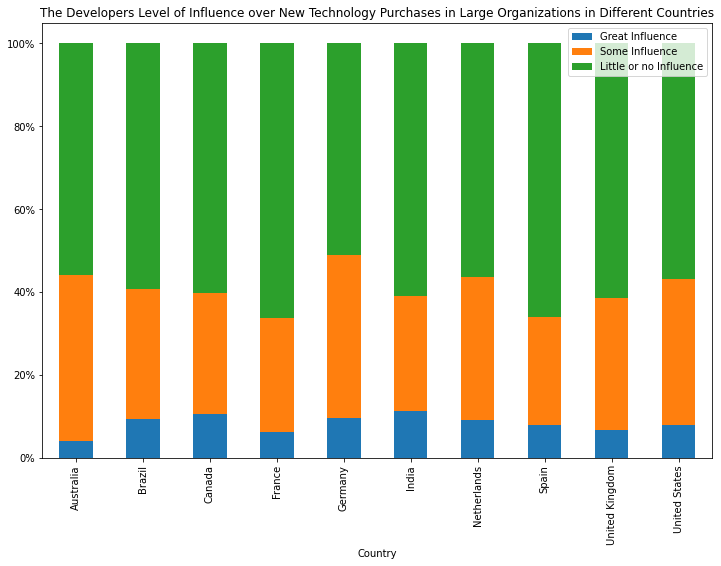

In [65]:
# The final step is to plot the data frame
plot_df(df_largeOrg,10,"The Developers Level of Influence over New Technology Purchases in Large Organizations in Different Countries")

Then, we will plot the level of influnce data per the selected countries in micro size organizations:

,Great Influence,Some Influence,Little or no Influence
Country,,,
Australia,35.443038,42.405063,22.151899
Brazil,32.110092,40.825688,27.064220
Canada,39.252336,45.327103,15.420561
France,35.267857,41.517857,23.214286
Germany,35.696822,41.320293,22.982885
India,26.797386,41.307190,31.895425
Netherlands,42.076503,36.065574,21.857923
Spain,30.000000,40.666667,29.333333
United Kingdom,38.405797,41.304348,20.289855


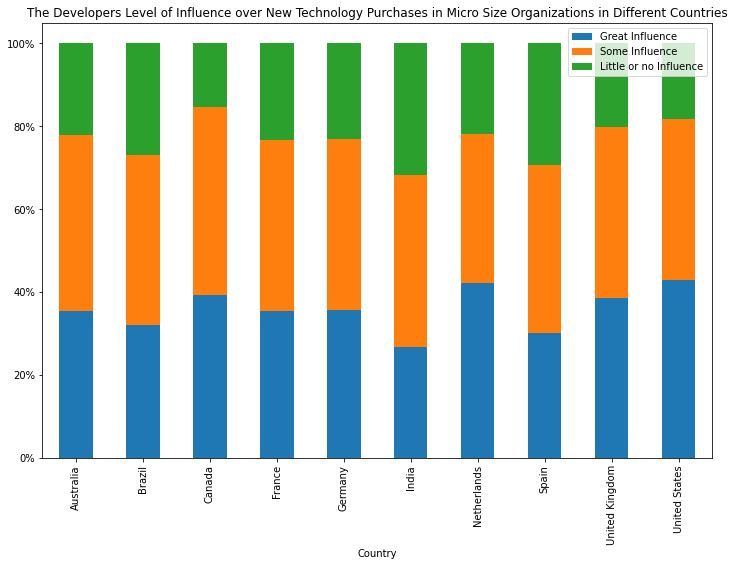

In [66]:
# Copy the data for micro size organizations specifically for the countries listed above to a new data frame
# Distribute the values of a column (PurchaseWhat) into 3 and calculate the values

df_microOrg = df2[df2['OrgSizeLabel']== 'Micro']
df_microOrg = df_microOrg[df_microOrg.Country.isin(analysis_countries)]

# Distribute the values of a column into 3
df_microOrg = pd.crosstab(index=[df_microOrg['Country']],columns=df_microOrg['PurchaseWhat']).apply(lambda r: r/r.sum()*100, axis=1)
df_microOrg.columns = ['Great Influence','Little or no Influence','Some Influence']
df_microOrg.index.names = ['Country']

# Redorder the row and column names
column_names = ['Great Influence','Some Influence','Little or no Influence'] 

df_microOrg = df_microOrg.reindex(columns=column_names)

# The final step is to plot the data frame
plot_df(df_microOrg,10,"The Developers Level of Influence over New Technology Purchases in Micro Size Organizations in Different Countries")
df_microOrg

## 5. Evaluation & 6. Deployement
The complete analysis can be found in the Medium page here.